## Problem Set 2A

In [31]:
# imports and formatting ONLY IN NOTEBOOK
try:
    import book_format, warnings
    %config InlineBackend.figure_format = 'svg'
    warnings.filterwarnings('ignore'); book_format.load_style()
except ImportError:
    pass

## <font style="color: red"> Esta práctica contiene 4 ejercicios obligatorios y uno extra adicional (2% de la nota total del curso)<!-- ONLY IN NOTEBOOK -->

### Ejercicio 1: Convolución

Completa la función `convolution` para que dada una matriz $A \in \mathbb{R}^{m_1\times n_1}$ y un filtro $f \in \mathbb{R}^{m_2 \times n_2}$ devuelva una matriz $C \in \mathbb{R}^{m \times n}$ con $m=m_1 - m_2 + 1$ y $n = n_1 - n_2 + 1$

Al hacer la convolución, el filtro $f$ se desplaza sobre la matriz $A$ y por cada parche $p$ de sobre el que se superpone el pixel $C_j$ correspondiente de $C$ se calcula por:

$$ C_j = \sum_i p_i f_i $$

es decir, multiplicando $p$ y $f$ elemento a elemento y sumando los resultados.


#### Ejemplo de ejecución

    A = np.array([[1,2,1,2,1,2],
                  [2,3,2,3,2,3],
                  [4,3,4,3,4,3],
                  [6,4,6,4,6,4],
                  [7,5,7,5,7,5]])
                  
    f = np.array([[2,2,2],
                  [2,2,2]])

    > convolution(A, f)

#### Resultado esperado

    [[ 22.  26.  22.  26.]
     [ 36.  36.  36.  36.]
     [ 54.  48.  54.  48.]
     [ 70.  62.  70.  62.]]
 

In [32]:
import numpy as np

def convolution(A, f):
    rows = A.shape[0]-f.shape[0]+1
    cols = A.shape[1]-f.shape[1]+1
    result=np.zeros((rows,cols))
 
    if cols<=0 or rows<=0:
        raise ValueError("filter must be smaller than matrix")
    #Tu CODIGO AQUÍ
    for i in range(rows):
        for j in range(cols):
            result[i,j]=np.sum(A[i:i+f.shape[0],j:j+f.shape[1]]*f)
            
            
    return result

In [33]:
# -- VERIFICA TU CODIGO --
A = np.array([[1,2,1,2,1,2],[2,3,2,3,2,3],[4,3,4,3,4,3],[6,4,6,4,6,4],[7,5,7,5,7,5]])
f = np.array([[2,2,2],[2,2,2]])
print convolution(A,f)

[[ 22.  26.  22.  26.]
 [ 36.  36.  36.  36.]
 [ 54.  48.  54.  48.]
 [ 70.  62.  70.  62.]]


<font style="color: red">comprueba tu progreso hasta ahora</font>

In [34]:
%run -i code/p_02A_eval

convolution correcto!!
convolution_sad correcto!!
min_sad correcto!!
index_min_sad_in_band correcto!!
min_sad_matrix correcto!!
---
calificacion: 5/5 (100%)


puedes ver también cómo funciona tu código con las imágenes que vimos en las notas. El resultado debería de mostrar los bordes verticales de la imagen original

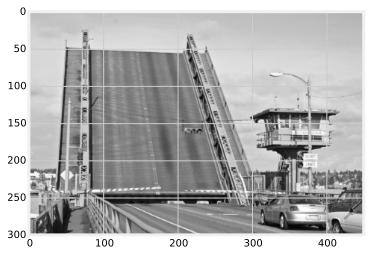

In [35]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

img = io.imread("imgs/puente.jpg")
gimg = np.mean(img, axis=2)
plt.imshow(gimg, cmap = plt.cm.Greys_r)

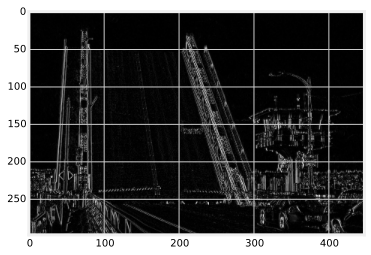

In [36]:
f = np.array([[0, 0, 0],
              [0,-1, 1],
              [0, 0, 0]])
bimg = convolution(gimg, f)
if bimg!=None:
    plt.imshow(np.abs(bimg), cmap = plt.cm.Greys_r)

### Ejercicio 2: Convolución de diferencias absolutas de matrices

Haremos ahora una convolución similar al ejercicio anterior (`convolution_sad`, por **s**um of **a**solute **d**iferences) pero la función de combinación del filtro $f$ con un parche $p$ de la matriz $A$ será la siguiente:

$$ C_j = \sum_i abs(p_i - f_i)$$


#### Ejemplo de ejecución

    A = np.array([[1,2,1,2,1,2],
                  [2,3,2,3,2,3],
                  [4,3,4,3,4,3],
                  [6,4,6,4,6,4],
                  [7,5,7,5,7,5]])
                  
    f = np.array([[2,2,2],
                  [2,2,2]])

    > convolution_sad(A, f)

#### Resultado esperado

    [[  3.   3.   3.   3.]
     [  6.   6.   6.   6.]
     [ 15.  12.  15.  12.]
     [ 23.  19.  23.  19.]] 

In [37]:
import numpy as np

def convolution_sad(A, f):
    rows = A.shape[0]-f.shape[0]+1
    cols = A.shape[1]-f.shape[1]+1
    result = np.zeros((rows, cols))
    if cols<=0 or rows<=0:
        raise ValueError("filter must be smaller than matrix")

    # TU CODIGO AQUI
    for i in range(rows):
        for j in range(cols):
                result[i,j]=np.sum(np.abs(A[i:i+f.shape[0],j:j+f.shape[1]]-f))
                
                
    return result

In [38]:
# -- VERIFICA TU CODIGO --
A = np.array([[1,2,1,2,1,2],[2,3,2,3,2,3],[4,3,4,3,4,3],[6,4,6,4,6,4],[7,5,7,5,7,5]])
f = np.array([[2,2,2],[2,2,2]])
print convolution_sad(A,f)

[[  3.   3.   3.   3.]
 [  6.   6.   6.   6.]
 [ 15.  12.  15.  12.]
 [ 23.  19.  23.  19.]]


<font style="color: red">comprueba tu progreso hasta ahora</font>

In [39]:
%run -i code/p_02A_eval

convolution correcto!!
convolution_sad correcto!!
min_sad correcto!!
index_min_sad_in_band correcto!!
min_sad_matrix correcto!!
---
calificacion: 5/5 (100%)


### Ejercicio 3: Índice del SAD mínimo

Si ejecutamos la función anterior sobre una matriz $A \in \mathbb{R}^{m\times n_1}$ y un filtro $f \in \mathbb{R}^{m \times n_2}$, es decir, con el mismo número de filas, `convolution_sad` devuelve una matriz $C \in \mathbb{R}^{1 \times n}$ con $n = n_1 - n_2 + 1$. Es decir, $C$ es un vector.

Dados $A$ y $f$ con el mismo número de filas, completa la función `min_sad` para que devuelva el índice del elemento del vector $C$ con el menor valor.

#### Ejemplo de ejecución

    A = np.array([[5,12,1,2,4,6],
                  [6, 5,2,3,2,1]])
    f = np.array([[2,2],
                  [2,2]])
    min_sad(A,f)

    A = np.array([[5,11,13,2,4,6],[6,5,2,3,2,11], [6,5,2,3,1,11]])
    f = np.array([[2,2],[2,2], [0,1]])
    min_sad(A,f)

#### Resultado
    2
    3     

In [40]:
import numpy as np

def min_sad(A, f):

    if A.shape[0]!=f.shape[0]:
        raise ValueError("filter and matrix must have the same number of rows")

    # TU CODIGO AQUI
    C=convolution_sad(A,f)
    result = C.argmin()
   
    return result


In [41]:
A = np.array([[5,12,1,2,4,6],[6, 5,2,3,2,1]])
f = np.array([[2,2],[2,2]])
print min_sad(A,f)
A = np.array([[5,11,13,2,4,6],[6,5,2,3,2,11], [6,5,2,3,1,11]])
f = np.array([[2,2],[2,2], [0,1]])
print min_sad(A,f)

2
3


<font style="color: red">comprueba tu progreso hasta ahora</font>

In [42]:
%run -i code/p_02A_eval

convolution correcto!!
convolution_sad correcto!!
min_sad correcto!!
index_min_sad_in_band correcto!!
min_sad_matrix correcto!!
---
calificacion: 5/5 (100%)


### Ejercicio 4: Índice al SAD mínimo entre matrices

Dadas dos matrices del mismo tamaño $A$ y $B$ $\in \mathbb{R}^{m\times n}$ completa la función `index_min_sad_in_band (A,B,k,r,c)` para que:

1- Extraiga de $A$ un parche de tamaño $k \times k$ cuyo elemento superior izquierdo está en la columna $c$ y la fila $r$ de $A$.

2- Haga la convolución SAD con la banda de la matriz $B$ que empieza en la fila $r$ y termina en la fila $r+k$ obteniendo un vector

3- Identifique el índice del vector anterior con el menor SAD.


**Ejemplo de ejecución**

    A=np.array([[1, 2, 1, 2, 1, 2],
                [2, 3, 1, 3, 2, 3],
                [4, 3, 4, 3, 4, 3],
                [6, 4, 6, 4, 1, 4],
                [7 5 2 5 7 5]])

    B1=np.array([[ 1,  4,  1,  4,  1,  4],
                 [ 4,  9,  1,  9,  4,  9],
                 [16,  9, 16,  9, 16,  9],
                 [36, 16, 36, 16,  1, 16],
                 [49, 25,  4, 25, 49, 25]])
            
    B2=np.array([[6, 5, 6, 5, 6, 5],
                 [5, 4, 6, 4, 5, 4],
                 [3, 4, 3, 4, 3, 4],
                 [1, 3, 1, 3, 6, 3],
                 [0, 2, 5, 2, 0, 2]])
    index_min_sad_in_band(A,B1,2,2,3)
    index_min_sad_in_band(A,B2,2,2,3)

**Resultado esperado**

    3
    1 

In [43]:
import numpy as np

def index_min_sad_in_band (A,B,k,r,c):
    # TU CODIGO AQUI
    A1= A[r:r+k,c:c+k]
    B1=B[r:r+k,0:B.shape[1]]
    result=convolution_sad(B1,A1).argmin()

    return result


In [44]:
## VERIFICA TU CODIGO
A = np.array([[1,2,1,2,1,2],[2,3,1,3,2,3],[4,3,4,3,4,3],[6,4,6,4,1,4],[7,5,2,5,7,5]])
B1 = A**2
B2 = 7-A
print A
print B1
print B2
print index_min_sad_in_band(A,B1,2,2,3)
print index_min_sad_in_band(A,B2,2,2,3)

[[1 2 1 2 1 2]
 [2 3 1 3 2 3]
 [4 3 4 3 4 3]
 [6 4 6 4 1 4]
 [7 5 2 5 7 5]]
[[ 1  4  1  4  1  4]
 [ 4  9  1  9  4  9]
 [16  9 16  9 16  9]
 [36 16 36 16  1 16]
 [49 25  4 25 49 25]]
[[6 5 6 5 6 5]
 [5 4 6 4 5 4]
 [3 4 3 4 3 4]
 [1 3 1 3 6 3]
 [0 2 5 2 0 2]]
3
1


<font style="color: red">comprueba tu progreso hasta ahora</font>

In [45]:
%run -i code/p_02A_eval

convolution correcto!!
convolution_sad correcto!!
min_sad correcto!!
index_min_sad_in_band correcto!!
min_sad_matrix correcto!!
---
calificacion: 5/5 (100%)


### Ejercicio 5: SAD mínimo entre imágenes

Dadas dos matrices del mismo tamaño $A$ y $B$ $\in \mathbb{R}^{m\times n}$ completa la función `min_sad_matrix (A,B,k)` para que genere una matriz nueva $C$ de $ (m-k+1) \times (n-k+1)$ en la que el valor de cada posición $r$, $c$ viene determinado por la distancia horizontal de parche en dicha posición de $A$ al SAD mínimo en la banda correspondiente en $B$:

    C[r,c] = np.abs(index_min_sad_in_band(A,B,k,r,c) - c)


**Ejemplo de ejecución**

    A=np.array([[1, 2, 1, 2, 1, 2],
                [2, 3, 1, 3, 2, 3],
                [4, 3, 4, 3, 4, 3],
                [6, 4, 6, 4, 1, 4],
                [7, 5, 2, 5, 7, 5]])

    B1=np.array([[ 1,  4,  1,  4,  1,  4],
                 [ 4,  9,  1,  9,  4,  9],
                 [16,  9, 16,  9, 16,  9],
                 [36, 16, 36, 16,  1, 16],
                 [49, 25,  4, 25, 49, 25]])
            
    B2=np.array([[6, 5, 6, 5, 6, 5],
                 [5, 4, 6, 4, 5, 4],
                 [3, 4, 3, 4, 3, 4],
                 [1, 3, 1, 3, 6, 3],
                 [0, 2, 5, 2, 0, 2]])
    min_sad_matrix(A,B1,2)
    min_sad_matrix(A,B2,2)
    
**Resultado esperado**

     [[ 2.  0.  0.  2.  2.]
      [ 2.  0.  0.  2.  2.]
      [ 3.  3.  1.  0.  0.]
      [ 1.  0.  0.  1.  3.]]

     [[ 0.  1.  2.  3.  4.]
      [ 3.  1.  1.  3.  1.]
      [ 4.  2.  2.  2.  4.]
      [ 1.  1.  1.  2.  2.]]
 

In [46]:
def min_sad_matrix (A,B,k):
    cols = A.shape[1]-k+1
    rows = A.shape[0]-k+1    
    result = np.zeros((rows, cols))

    # TU CODIGO AQUI
    for r in range(rows):
        for c in range(cols):
            result[r,c]=np.abs(index_min_sad_in_band(A,B,k,r,c) - c)
    
    return result

In [47]:
## VERIFICA TU CODIGO
A = np.array([[1,2,1,2,1,2],[2,3,1,3,2,3],[4,3,4,3,4,3],[6,4,6,4,1,4],[7,5,2,5,7,5]])
B1 = A**2
B2 = 7-A
print min_sad_matrix(A,B1,2)
print min_sad_matrix(A,B2,2)

[[ 2.  0.  0.  2.  2.]
 [ 2.  0.  0.  2.  2.]
 [ 3.  3.  1.  0.  0.]
 [ 1.  0.  0.  1.  3.]]
[[ 0.  1.  2.  3.  4.]
 [ 3.  1.  1.  3.  1.]
 [ 4.  2.  2.  2.  4.]
 [ 1.  1.  1.  2.  2.]]


<font style="color: red">comprueba tu progreso hasta ahora</font>

In [48]:
%run -i code/p_02A_eval

convolution correcto!!
convolution_sad correcto!!
min_sad correcto!!
index_min_sad_in_band correcto!!
min_sad_matrix correcto!!
---
calificacion: 5/5 (100%)


##Mapas de profundidad

Con esto, podemos realizar un mapa de profundidad a partir de dos imágenes estereoscópicas con dos cámaras alineadas horizontalmente. Prueba tu código con las siguientes dos imágenes. Ten paciencia porque seguramente tarde uno o dos minutos en procesar las imágenes.

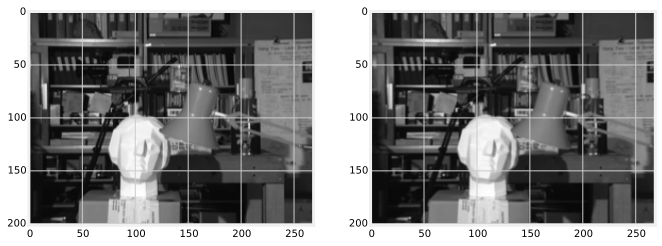

In [49]:
img_l = io.imread("imgs/office_l.png")
img_r = io.imread("imgs/office_r.png")
img_l = np.mean(img_l, axis=2)
img_r = np.mean(img_r, axis=2)
fig=plt.figure(figsize=(10,20))
fig.add_subplot(121)
plt.imshow(img_l, cmap = plt.cm.Greys_r)
fig.add_subplot(122)
plt.imshow(img_r, cmap = plt.cm.Greys_r)



Si lo ejecutas con `k=10`, tu resultado debería de ser como este. A la izquierda sin filtrar, y a la derecha filtrando los valores más altos y normalizando.

<img src="imgs/office_depth.png">

In [50]:
r = min_sad_matrix(img_l, img_r, 10)

(193, 260)
(202, 269)
245.0 0.0


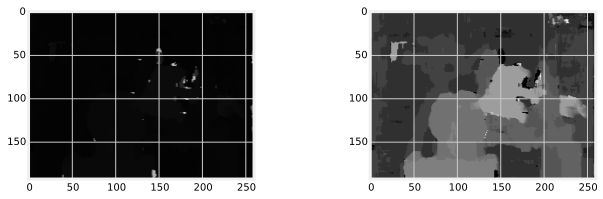

In [51]:
print r.shape
print img_l.shape
rr = np.copy(r)
rr[rr>20]=0
fig = plt.figure(figsize=(10,3))
fig.add_subplot(121)
plt.imshow(r, cmap = plt.cm.Greys_r)
fig.add_subplot(122)
plt.imshow(rr, cmap = plt.cm.Greys_r)
print np.max(r), np.min(r)

---

**Obtén la calificación de esta práctica**

In [52]:
%run -i code/p_02A_eval

convolution correcto!!
convolution_sad correcto!!
min_sad correcto!!
index_min_sad_in_band correcto!!
min_sad_matrix correcto!!
---
calificacion: 5/5 (100%)


### Ejercicio EXTRA: Mapa de profundidad optimizado

Modifica las funciones anteriores para que la búsqueda del parche más similar de una imagen a otra no se realice en toda la banda de la imagen, sino solamente en un entorno de 20 pixeles a la derecha y otros 20 a la izquierda. Puedes basar tu código en las funciones anteriores, y para no dañarlas puedes copiar tu código en las funciones de la celda siguiente y realizar el ejercicio extra aquí.

In [71]:
import numpy as np

def convolution(A, f):
    rows = A.shape[0]-f.shape[0]+1
    cols = A.shape[1]-f.shape[1]+1
    result=np.zeros((rows,cols))
 
    if cols<=0 or rows<=0:
        raise ValueError("filter must be smaller than matrix")
    #Tu CODIGO AQUÍ
    for i in range(rows):
        for j in range(cols):
            result[i,j]=np.sum(A[i:i+f.shape[0],j:j+f.shape[1]]*f)
            
            
    return result

def convolution_sad(A, f):
    rows = A.shape[0]-f.shape[0]+1
    cols = A.shape[1]-f.shape[1]+1
    result = np.zeros((rows, cols))
    if cols<=0 or rows<=0:
        raise ValueError("filter must be smaller than matrix")

    # TU CODIGO AQUI
    for i in range(rows):
        for j in range(cols):
                result[i,j]=np.sum(np.abs(A[i:i+f.shape[0],j:j+f.shape[1]]-f))
                
                
    return result

def min_sad(A, f):
    if A.shape[0]!=f.shape[0]:
        raise ValueError("filter and matrix must have the same number of rows")

    # TU CODIGO AQUI
    C=convolution_sad(A,f)
    result = C.argmin()# posision en la que se encuentra el minimo valor del arreglo 
#     print C
   
    return result

def index_min_sad_in_band (A,B,k,r,c):
    
    ini=c-20;
    fin=c+20;
    d=c;
    if(ini<0):
        ini=0;
        d=0;
    if(fin>B.shape[1]):
         fin=B.shape[1];
            
    
    A1= A[r:r+k,c:c+k]
    B1=B[r:r+k,ini:fin]
    result=min_sad(B1,A1)+d;

    return result

def min_sad_matrix (A,B,k):
    cols = A.shape[1]-k+1
    rows = A.shape[0]-k+1    
    result = np.zeros((rows, cols))

    # TU CODIGO AQUI
    for r in range(rows):
        for c in range(cols):
            result[r,c]=np.abs(index_min_sad_in_band(A,B,k,r,c) - c)
    
    return result

r = min_sad_matrix(img_l, img_r, 10)




(193, 260)
(202, 269)
30.0 0.0


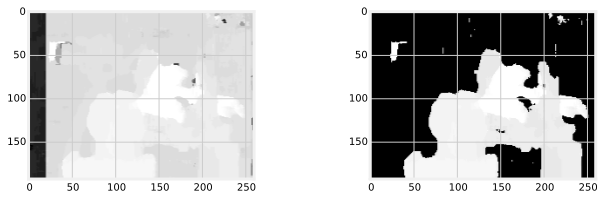

In [93]:
print r.shape
print img_l.shape
rr = np.copy(r)
rr[rr<25]=0
fig = plt.figure(figsize=(10,3))
fig.add_subplot(121)
plt.imshow(r, cmap = plt.cm.Greys_r,vmin=0, vmax=30)
fig.add_subplot(122)
plt.imshow(rr, cmap = plt.cm.Greys_r,vmin=0, vmax=30)

print np.max(r), np.min(r)